# NumPy -  multidimensional data arrays
# ... with some Matplotlib

`
Eric Larson
`

Based on the work of
- Alexandre Gramfort (MNE) and
- J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/

In [1]:
# what is this line all about?!? Answer later
%matplotlib inline

## Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` first import the module:

In [2]:
import numpy as np # np is the most common import name for numpy

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [4]:
# a vector: the argument to the array function is a Python list
v = np.array([1, 0, 3, 4])
# print v, and the type of v
print(v)
type(v)

[1 0 3 4]


numpy.ndarray

In [7]:
# a matrix (or better a 2d array): the argument to the array function is a nested Python list
M = np.array([[1, 0], [3, 4]])
# print M
print(M)

[[1 0]
 [3 4]]


The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [8]:
# show the type of v and of M
type(M)

numpy.ndarray

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [9]:
# get the shape of v
v.shape

(4,)

In [10]:
# note the type of v.shape
type(v.shape)

tuple

In [11]:
# get the shape of M
print(M.shape)

(2, 2)


The number of elements in the array is available through the `ndarray.size` property:

In [12]:
# get the size -- be careful matlab size is shape with NumPy!
print(v.size)
print(M.size)

4
4


So far the `numpy.ndarray` looks awefully much like a Python list (or nested list).

**Why not simply use Python lists for computations instead of creating a new array type?**

There are several reasons:

* Python lists are very general:
  - They can contain any kind of object
  - They are dynamically typed
  - They do not support mathematical functions such as matrix and dot multiplications, etc.

NumPy array are:

* **statically typed** and **homogeneous**. The type of the elements is determined when array is created.
* Memory efficient.
* Allow fast implementation of mathematical functions in compiled code.

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [13]:
print(M.dtype) # show M's dtype

int64


We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [14]:
M[0, 0] = 'bad'  # try to assign "hello" to the upper left element

ValueError: invalid literal for int() with base 10: 'bad'

In [15]:
M[0, 0] = 1.5 # try to assign a float to the upper left element
print(M) # print the result

[[1 0]
 [3 4]]


If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [19]:
M = np.array([[1, 0], [3, 4]], np.complex) # create M, a complex array with shape (2, 2)
M[0, 0] = 1.5
print(M) # print M


[[1.5+0.j 0. +0.j]
 [3. +0.j 4. +0.j]]


Common types that can be used with `dtype`:

* `int`
* `float`
* `complex`
* `bool`

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generates arrays of different forms. Some of the more common are:

#### arange

In [21]:
x = np.arange(0, 10)  # create x from 0, 1, ..., 9
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [22]:
x = np.arange(-1, 1, 0.1)  # create x from -1 to 1 in steps of 0.1
print(x)

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]


#### linspace and logspace

In [24]:
x = np.linspace(0, 1, 10)  # using linspace, both end points ARE included
print(x)
x = np.linspace(0, 10, 25)  # create array from 0 to 10, 25 elements
print(x)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[ 0.          0.41666667  0.83333333  1.25        1.66666667  2.08333333
  2.5         2.91666667  3.33333333  3.75        4.16666667  4.58333333
  5.          5.41666667  5.83333333  6.25        6.66666667  7.08333333
  7.5         7.91666667  8.33333333  8.75        9.16666667  9.58333333
 10.        ]


In [25]:
# create log-spaced data, 0 to 10, 10 elements
print(np.logspace(0, 10, 10))

[1.00000000e+00 1.29154967e+01 1.66810054e+02 2.15443469e+03
 2.78255940e+04 3.59381366e+05 4.64158883e+06 5.99484250e+07
 7.74263683e+08 1.00000000e+10]


### First demo of Matplotlib

First, import:

In [26]:
import matplotlib.pyplot as plt # import matplotlib is most often done using "plt" as an alias

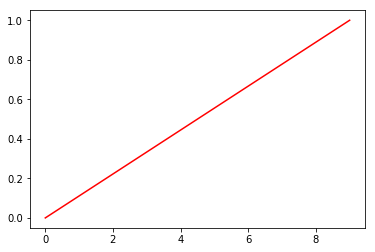

In [27]:
x = np.arange(0, 10)  # x data from 0 to 9
y = np.linspace(0, 1, 10) # y data as 0 to 1, 10 elements
plt.plot(x, y, 'r-')  # plot the data as a red line
plt.show()  # show the plot

#### random data

In [28]:
from numpy import random # import random submodule of NumPy

In [29]:
x = random.rand(5, 5) # shape (5, 5) uniform random numbers in [0,1]
print(x)

[[0.66867311 0.35317394 0.63493251 0.5472397  0.10933246]
 [0.29099658 0.2590029  0.59547212 0.83652278 0.3453285 ]
 [0.82994883 0.34075351 0.1029927  0.72039385 0.44087894]
 [0.87094097 0.32801115 0.77177856 0.18112646 0.59910743]
 [0.69848647 0.12429616 0.33578861 0.36856015 0.69080885]]


In [30]:
x = random.randn(5, 5)  # standard normal distributed random numbers
print(x)

[[ 0.18057247 -0.92300503 -0.54869637  1.138543   -0.06970905]
 [ 0.49238966  0.7861138   1.48629807  2.21248713 -0.18132759]
 [ 0.57581772 -1.1625285  -0.05458411 -0.43917363  0.28151315]
 [ 0.34397356  0.25352392 -0.78481538 -0.8754882   1.13391234]
 [-0.71792639 -0.40699086 -0.06653698 -0.15145506  0.84504088]]


### More matplotlib

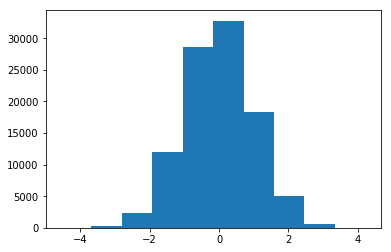

In [31]:
x = random.randn(100000)  # 100000 normally distributed numbers
plt.hist(x)  # matplotlib hist(ogram)
plt.show()  # show it

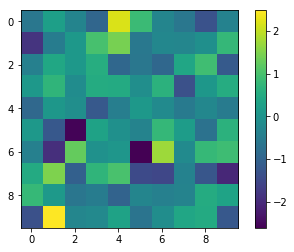

In [33]:
x = random.randn(10, 10) # shape (10, 10) random data
plt.imshow(x, interpolation='nearest', cmap='viridis')  # imshow with nearest interpolation, cmap viridis
plt.colorbar() # add a colorbar
plt.show()  # show it

#### diag

In [35]:
y = np.diag(np.diag([1, 3, 5]))  # create a diagonal matrix
print(y)

[1 3 5]


In [36]:
y = np.diag([1, 3, 5], k=-1)  # diagonal with offset (k) from the main diagonal 
print(y)

[[0 0 0 0]
 [1 0 0 0]
 [0 3 0 0]
 [0 0 5 0]]


#### zeros and ones

In [40]:
x = np.zeros((3, 3)) # create a an array of shape (3, 3) of zeros
x[:] = 5
print(x)

[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]


In [38]:
x = np.ones((3, 3))  # similar for ones
print(x)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [42]:
x = np.full((3, 3), 5)  # and for any single value (full)
print(x)

[[5 5 5]
 [5 5 5]
 [5 5 5]]


## File I/O

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [44]:
M = random.randn(3, 3)  # M as (3, 3) rand

In [45]:
np.savetxt('temp.txt', M)  # savetxt writes these to a text file with reasonable defaults
!cat temp.txt # use a system command (!cat) to check

2.334422400797450337e+00 5.966002017265075175e-01 -3.253052765672371782e-01
-8.782480660309059939e-01 -9.080116957475228290e-01 2.094213433118051970e+00
-7.670690277467273610e-01 2.680162671021604215e-01 2.881567137109306564e-01


In [47]:
np.savetxt('temp.txt', M, fmt='%0.1f', delimiter='\t') # change fmt and delimiter
!cat temp.txt # look at the result with !cat

2.3	0.6	-0.3
-0.9	-0.9	2.1
-0.8	0.3	0.3


In [48]:
# load with loadtxt, minding the delimiter
y = np.loadtxt('temp.txt')
print(y)

[[ 2.3  0.6 -0.3]
 [-0.9 -0.9  2.1]
 [-0.8  0.3  0.3]]


### Numpy's native file format

Useful when storing and reading back numpy array data. Use the functions `numpy.save` and `numpy.load`:

In [49]:
np.save('temp.npy', M) # np.save writes in binary format
!file temp.npy  # inspect using !file

temp.npy: data


In [51]:
M2 = np.load('temp.npy')  # np.load loads it again
print(M, M2)

[[ 2.3344224   0.5966002  -0.32530528]
 [-0.87824807 -0.9080117   2.09421343]
 [-0.76706903  0.26801627  0.28815671]] [[ 2.3344224   0.5966002  -0.32530528]
 [-0.87824807 -0.9080117   2.09421343]
 [-0.76706903  0.26801627  0.28815671]]


## More properties of the numpy arrays

In [52]:
print(M.dtype) # dtype
print(M.itemsize) # itemsize: bytes per element

float64
8


In [53]:
print(M.nbytes)  # nbytes: number of bytes
print(M.size * M.itemsize)  # ... which is the size * itemsize

72
72


In [54]:
print(M.ndim, len(M.shape))  # ndim: number of dimensions 

2 2


## Manipulating arrays

### Indexing

We can index elements in an array using the square bracket and indices:

In [55]:
v = np.array([1, 0, 3, 4])
print(v.shape)  # v is a vector, and has only one dimension, taking the first index
print(v[0])

(4,)
1


In [56]:
print(M[0, 0])  # M is a matrix, or a 2 dimensional array, taking two indices

2.3344224007974503


If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [57]:
print(M) # print all of M

[[ 2.3344224   0.5966002  -0.32530528]
 [-0.87824807 -0.9080117   2.09421343]
 [-0.76706903  0.26801627  0.28815671]]


In [58]:
print(M[0])  # print row 1 of M

[ 2.3344224   0.5966002  -0.32530528]


The same thing can be achieved with using `:` instead of an index: 

In [59]:
print(M[0, :])  # row 1

[ 2.3344224   0.5966002  -0.32530528]


In [60]:
print(M[:, 0]) # column 1

[ 2.3344224  -0.87824807 -0.76706903]


We can assign new values to elements in an array using indexing:

In [61]:
M[0, 0] = 5. # assign to upper left of M
print(M) # print M

[[ 5.          0.5966002  -0.32530528]
 [-0.87824807 -0.9080117   2.09421343]
 [-0.76706903  0.26801627  0.28815671]]


In [62]:
# also works for rows and columns
M[1] = 0.5 # assign to row 1 of M
M[:, 0] = 2 # assign to column 2 of M
print(M)

[[ 2.          0.5966002  -0.32530528]
 [ 2.          0.5         0.5       ]
 [ 2.          0.26801627  0.28815671]]


In [ ]:
# print M

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [63]:
A = np.array([1, 2, 3, 4, 5])
print(A)

[1 2 3 4 5]


In [64]:
print(A.shape)

(5,)


In [65]:
A[1:3]  # get an array slice from index 1 to 3 (excluding endpoint!)

array([2, 3])

Array slices are *mutable* because they create a *view* of the array, rather than a *copy*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [66]:
B = A[1:3]  # assign B part of A
B[0] = 100  # modify all of B
print(A) # show that it affects A

[  1 100   3   4   5]


We can omit any of the three parameters in `M[lower:upper:step]`:

In [68]:
A[::2] # with : or :: t hen lower, upper, step all take the default values

array([1, 3, 5])

In [ ]:
# step is 2, lower and upper defaults to the beginning and end of the array

In [69]:
A[:3]  # first three elements

array([  1, 100,   3])

In [70]:
A[3:] # elements from index 3 onward

array([4, 5])

In [71]:
B = np.zeros((4, 4))
B[1] = 1
print(B)
print(B[1::2, :])

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [0. 0. 0. 0.]]


Negative indices count from the end of the array (positive index from the begining):

In [74]:
A = np.arange(1, 6) # create A as a vector from 1 to 5
print(A)

[1 2 3 4 5]


In [75]:
A[-1]  # get the last (-1) element in the array

5

In [76]:
A[-3:]  # get the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [77]:
x = np.array([[10 * row + col for col in range(1, 5)] for row in range(1, 5)])  # create 4x4 with tens digit as row, ones digit as col index
print(x)

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]]


In [78]:
# show middle 2x2
print(x[1:3, 1:3])

[[22 23]
 [32 33]]


In [79]:
# stride by 2 in each dimension
print(x[::2, ::2])

[[11 13]
 [31 33]]


### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [83]:
A = random.randn(4, 4)
print(A[[0, 1, 2]])

[[ 0.4127872  -3.20210242 -0.69662272  1.01954399]
 [ 0.68676875  0.78156275 -0.47551094 -0.04501008]
 [ 0.96260866  0.17069703 -0.98640984  1.07846006]]


In [85]:
# Get 3 elements, these rows matched these with
# cols 0, 1, last (recall -1 means the last element)
A[np.ix_([0, 3], [0, 3])]

array([[ 0.4127872 ,  1.01954399],
       [-1.15585249,  1.65581635]])

In [ ]:
# to actually do row x col combinations, you can np.ix_ them

We can also index masks: If the index mask is an Numpy array of with data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position each element: 

In [86]:
B = np.arange(0, 5)  # create B as the integers from 0 to 4

In [87]:
mask = B % 2 == 0  # get the indices of even elements using mod 2 

In [90]:
print(mask)  # manually create a 5-element mask using bools, use it
B[[True, False, True, True, True]]

[ True False  True False  True]


array([0, 2, 3, 4])

In [93]:
B[np.array([1, 0, 1, 1, 1], bool)]  # same thing with np.array(..., dtype=bool) casting of ints

array([0, 2, 3, 4])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [94]:
x = np.linspace(0, 1, 10)  # create an array x using linspace

In [95]:
mask = x > 0.5  # create a mask for elements between 5 and 7

In [96]:
x[mask] # apply this mask to x

array([0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

## Functions for extracting data from arrays and creating arrays

### where

The index mask can be converted to position index using the `where` function

In [99]:
np.where(mask)[0] # get indices from mask

array([5, 6, 7, 8, 9])

In [100]:
x[np.where(mask)[0]]  # index x using indices: equivalent to the fancy indexing x[mask]

array([0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

### diag

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [102]:
print(np.diag(A))  # get diagonal elements of A

[ 0.4127872   0.78156275 -0.98640984  1.65581635]


In [103]:
print(np.diag(A, -1))  # get diagonal elements offset left by one

[ 0.68676875  0.17069703 -1.41924581]


## Array oriented algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [104]:
v1 = np.arange(1, A.shape[0] + 1)  # create v1 as integers 0 to A.shape[0] - 1
print(v1)

[1 2 3 4]


In [105]:
v1 * 2# multiply by two

array([2, 4, 6, 8])

In [106]:
v1 + 2# add two

array([3, 4, 5, 6])

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [107]:
A * A # multiply A by itself: element-wise multiplication
# this is NOT a matrix / dot product!)

array([[1.70393272e-01, 1.02534599e+01, 4.85283211e-01, 1.03946994e+00],
       [4.71651323e-01, 6.10840337e-01, 2.26110656e-01, 2.02590774e-03],
       [9.26615427e-01, 2.91374764e-02, 9.73004365e-01, 1.16307610e+00],
       [1.33599497e+00, 1.96822847e+00, 2.01425867e+00, 2.74172778e+00]])

In [108]:
v1 * v1 # multiply v1 by itself

array([ 1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [120]:
print(A.shape, v1[:, np.newaxis].shape)  # look at the shape of A and v1

(4, 4) (4, 1)


In [123]:
print(A * v1[:, np.newaxis]) # tile v1 to match the shape of A 

[[ 0.4127872  -3.20210242 -0.69662272  1.01954399]
 [ 1.37353751  1.56312551 -0.95102188 -0.09002017]
 [ 2.88782597  0.51209109 -2.95922951  3.23538018]
 [-4.62340994 -5.61174265 -5.67698324  6.62326539]]


In [ ]:
# use np.newaxis to make v1 have two dimensions

In [ ]:
# print shapes of A and v1

In [ ]:
# multiply A by v1 using tile
# multiple A by v1 using np.newaxis

In [ ]:
# do an outer product of v1 with itself using np.outer
# show that this is the same as using np.newaxis

In [ ]:
# show that v1.reshape can be used to add axes

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [124]:
np.dot(A, A) # dot A with itself

array([[-3.87772813, -5.37369692,  0.47524976,  1.50187943],
       [ 0.4145363 , -1.60628561, -0.31713131,  0.07766476],
       [-1.68148547, -4.63034838, -1.30933892,  1.69566697],
       [-4.72067123,  0.03941093,  0.52225197,  0.09583166]])

In [125]:
np.dot(A, v1)  # dot A with v1

array([-4.00310983,  0.6433211 ,  2.65861346, -1.59619585])

In [ ]:
# dot v1 with v1

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

In [126]:
A.shape # remind us of the shape of A

(4, 4)

#### mean

In [127]:
A.mean()  # get the mean of A

-0.16346532256938223

In [128]:
A[:, -1].mean()  # get the mean of the last column of A

0.9272025784759752

In [131]:
A.mean(axis=1)  # get the mean of all columns of A

array([-0.61659849,  0.23695262,  0.30633898, -0.5805544 ])

#### standard deviation, variance, min, max, peak-to-peak...

In [133]:
np.ptp(A, axis=0)  # np.std, np.var, np.min, np.max, np.ptp

array([2.11846114, 3.98366517, 0.94373487, 1.70082643])

In [134]:
np.percentile(A, [10, 90])  # percentile

array([-1.41109074,  1.04900203])

#### sum, prod, and trace

In [135]:
np.sum(np.arange(1, 11)) # create an array d of values 1 to 10

55

In [137]:
np.sum(A)  # sum up all elements

-2.6154451611101157

In [142]:
np.sum([1, 2, 5])


8

In [143]:
np.cumsum(np.arange(5))  # cummulative sum

array([ 0,  1,  3,  6, 10])

## EXERCISE :

Compute an approximation of $\pi$ using Wallis' formula (no loop just using Numpy):

<!-- <img src="files/images/spyder-screenshot.jpg" width="800"> -->
<img src="http://scipy-lectures.github.io/_images/math/31913b3982be13ed2063b0ffccbcab9cf4931fdb.png" width="200">

In [ ]:
my_pi = ...

### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc., is applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [144]:
A = random.randn(3, 3) # create a random array of shape (3, 3)

In [145]:
A.max()  # global max

0.6289791871489324

In [146]:
A.max(axis=0)  # max in each column

array([0.62897919, 0.15028268, 0.46703462])

In [147]:
A.max(axis=1)  # max in each row

array([-0.15506835,  0.62897919, -0.37862581])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [148]:
print(A)  # print A

[[-0.74904368 -0.15506835 -1.37273249]
 [ 0.62897919  0.15028268  0.46703462]
 [-0.47403195 -0.37862581 -0.49396187]]


In [153]:
np.reshape(A, (1, n * m))

array([[-0.74904368, -0.15506835, -1.37273249,  0.62897919,  0.15028268,
         0.46703462, -0.47403195, -0.37862581, -0.49396187]])

In [152]:
np.reshape(A, (1, n * m)) # create array B that has shape (1, n * m)

array([[-0.74904368, -0.15506835, -1.37273249,  0.62897919,  0.15028268,
         0.46703462, -0.47403195, -0.37862581, -0.49396187]])

In [156]:
B = np.reshape(A, (1, n * m)).copy() # modify B

In [157]:
B[0] = 10000 # print A, showing that it is also changed:
print(A)  # B is view of the same data!

[[100. 100. 100.]
 [100. 100. 100.]
 [100. 100. 100.]]


## Adding a new dimension: newaxis

With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [ ]:
# create array v of values 1, 2, 3

In [ ]:
# show v's shape

In [ ]:
# make a 1-column matrix of the vector v

In [ ]:
# make a 1-row matrix of the vector v

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones.

**But in practice they are almost always possible to avoid**

### tile and repeat

In [158]:
a = np.arange(4)  # create an array a of shape (2, 2) of the values 1 through 4

In [161]:
np.repeat(a, 2)  # repeat each element twice

array([0, 0, 1, 1, 2, 2, 3, 3])

In [162]:
np.tile(a, 2)  # tile the matrix twice

array([0, 1, 2, 3, 0, 1, 2, 3])

### concatenate

In [170]:
b = np.array([5, 6]) # make an array b of shape (2,): values 5 and 6
print(A[:2, :2].shape, b[:, np.newaxis].shape)
np.concatenate([A[:2, :2], b[:, np.newaxis]], axis=1)  # try to concatenate a and b

(2, 2) (2, 1)


array([[100., 100.,   5.],
       [100., 100.,   6.]])

In [ ]:
# fix b so that it's shape (1, 2)
# concatenate a and b arrays (default is axis=0)

In [ ]:
# concatenate a and b.T along axis=1

### hstack and vstack

In [ ]:
# vstack a and b

In [ ]:
# hstack a and b.T

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (techincal term: pass by reference). 

In [ ]:
# Create variable B that refers to the same array data as A 

In [173]:
A = random.randn(3, 3)
B = A.copy()
B[0, 0] = 100
print(A)
print(B)

[[-0.74038762  1.63216236 -0.01504031]
 [-1.4284922  -0.45880986  0.34918442]
 [-0.9976654  -0.55898372  0.25875756]]
[[ 1.00000000e+02  1.63216236e+00 -1.50403132e-02]
 [-1.42849220e+00 -4.58809862e-01  3.49184423e-01]
 [-9.97665395e-01 -5.58983725e-01  2.58757564e-01]]


In [174]:
B = A[0] # using single-index into A creates a view
B[0] = 1000
print(A)

[[ 1.00000000e+03  1.63216236e+00 -1.50403132e-02]
 [-1.42849220e+00 -4.58809862e-01  3.49184423e-01]
 [-9.97665395e-01 -5.58983725e-01  2.58757564e-01]]


In [ ]:
# so modifying B[0] modifies A

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [175]:
B = A[0].copy()  # make B as a copy of A
B[0] = -100
print(A)

[[ 1.00000000e+03  1.63216236e+00 -1.50403132e-02]
 [-1.42849220e+00 -4.58809862e-01  3.49184423e-01]
 [-9.97665395e-01 -5.58983725e-01  2.58757564e-01]]


In [ ]:
# now, if we modify B, A is not affected

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). In interpreted languages like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [177]:
v = np.arange(1, 5)  # create v as values 1 through 4, iterate over it, print
for value in v:
    print(value)

1
2
3
4


In [181]:
M = random.randn(2, 2)  # reshape to make M of shape (2, 2), iterate over it twice
for row_idx, row in enumerate(M):
    print('row %d' % row_idx)
    for row_col in row:
        print(row_col)

row 0
1.4381736362936857
-0.8831604668922024
row 1
-1.3146796360128634
-0.26781547244229326


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [ ]:
# iterate over the enumerate(M), squaring each element

In [ ]:
# show that each element in M is now squared

## Using arrays in conditions

When using arrays in conditions in for example `if` statements and other boolean expressions, one need to use one of `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [187]:
(M > 0).any(axis=1).all()

False

In [ ]:
# use (M > ...).any() and print to show some logical branching

In [ ]:
# use (M > ...).all(...) and print to show more branching

## Type casting

Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions (see also the similar `asarray` function). This always create a new array of new type:

In [190]:
M.dtype  # show M's dtype
print(M)

[[ 1.43817364 -0.88316047]
 [-1.31467964 -0.26781547]]


In [192]:
M2 = np.round(M).astype(int)  # create M2 as int version
print(M2)

[[ 1 -1]
 [-1  0]]


In [193]:
# show M2's dtype
M2.dtype

dtype('int64')

In [ ]:
# create M3 as bool version

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.